In [1]:
from lightgbm import Dataset
from lightgbm import LGBMClassifier
from lightgbm import train
from matplotlib.pyplot import plot
from numpy import ndarray
from pandas import DataFrame
from pandas import read_csv
from pandas import Series
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
train_df = read_csv('../input/spaceship-titanic/train.csv')
print(train_df.columns.tolist())

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']


In [3]:
def prepare(input_df: DataFrame) -> ndarray:
    result_df = input_df.drop(columns=['PassengerId', 'Name', 'Transported'], errors='ignore').copy(deep=True)
    columns = ['CryoSleep', 'Destination', 'HomePlanet', 'VIP',]
    for column in columns:
        result_df[column] = LabelEncoder().fit_transform(y=result_df[column])
    # todo do something with Cabin
    result_df = result_df.drop(columns=['Cabin'])
    return result_df.columns, result_df.values

# get the labels
y = train_df['Transported'].values
out_columns, x = prepare(input_df=train_df)

# split
random_state = 1
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state, stratify=y)
train_data = Dataset(x, label=y) #, categorical_feature='auto')
test_data = Dataset(x_test, label=y_test)

In [4]:
# parameters = {
#     'bagging_fraction': 0.5,
#     'bagging_freq': 20,
#     'boosting': 'gbdt',
#     'categorical_feature': 'auto',
#     'deterministic': True,
#     'feature_fraction': 0.5,
#     'feature_name': 'auto',
#     'is_unbalance': False,
#     'learning_rate': 0.1, # was 0.05,
#     'objective': 'binary',
#     'metric': 'auc', # was 'auc'
#     'num_leaves': 31,
#     'verbosity': -2
# }
# num_boost_round = 200 # was 200
# model = train(parameters, train_data, valid_sets=test_data, num_boost_round=num_boost_round,)
model = LGBMClassifier(early_stopping_rounds=20,)
model.fit(X=x, y=y, eval_set=(x_test, y_test))

[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[1]	valid_0's binary_logloss: 0.654099
[2]	valid_0's binary_logloss: 0.622518
[3]	valid_0's binary_logloss: 0.596406
[4]	valid_0's binary_logloss: 0.574072
[5]	valid_0's binary_logloss: 0.555282
[6]	valid_0's binary_logloss: 0.53967
[7]	valid_0's binary_logloss: 0.52632
[8]	valid_0's binary_logloss: 0.514544
[9]	valid_0's binary_logloss: 0.504351
[10]	valid_0's binary_logloss: 0.496059
[11]	valid_0's binary_logloss: 0.488305
[12]	valid_0's binary_logloss: 0.4823
[13]	valid_0's binary_logloss: 0.476661
[14]	valid_0's binary_logloss: 0.470598
[15]	valid_0's binary_logloss: 0.465544
[16]	valid_0's binary_logloss: 0.461743
[17]	valid_0's binary_logloss: 0.457825
[18]	valid_0's binary_logloss: 0.455502
[19]	valid_0's binary_logloss: 0.453291
[20]	valid_0's binary_logloss: 0.451463
[21]	valid_0's binary_logloss: 0.44874
[22]	valid_0's binary_logloss: 0.446988


LGBMClassifier(early_stopping_rounds=20)

<AxesSubplot:>

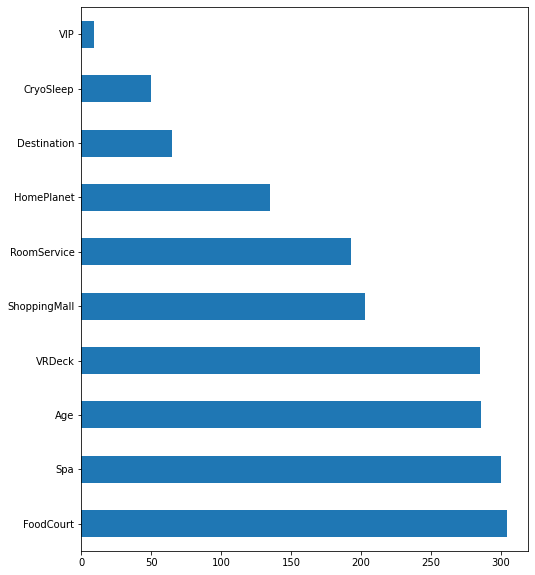

In [5]:
importance = Series(model.feature_importances_, index=out_columns)
importance.nlargest(30).plot(kind='barh', figsize=(8,10))

In [6]:
submission_df = read_csv('../input/spaceship-titanic/test.csv')
ids = submission_df['PassengerId'].values
submission_columns, submission_data = prepare(input_df=submission_df)
output_df = DataFrame({'PassengerId': ids, 'Transported': model.predict(submission_data) > 0.5})
output_df.to_csv('submission.csv', index=False)

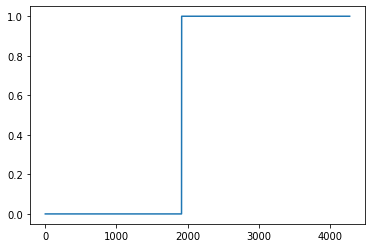

In [7]:
y_pred = model.predict(submission_data)
plot(sorted(y_pred.tolist()), )